Machine Learning
Course-End Project Problem Statement
Anna Poltavets

# Creating Cohorts of Songs

### Problem Scenario:
The customer always looks forward to specialized treatment, whether shopping on an e-commerce website or watching Netflix. The customer desires content that aligns with their preferences. To maintain customer engagement, companies must consistently provide the most relevant information.

Starting with Spotify, a Swedish audio streaming and media service provider, boasts over 456 million active monthly users, including more than 195 million paid subscribers as of September 2022. The company aims to create cohorts of different songs to enhance song recommendations. These cohorts will be based on various relevant features, ensuring that each group contains similar types of songs.

### Problem Objective:
As a data scientist, you should perform exploratory data analysis and cluster analysis to create cohorts of songs. The goal is to better understand the various factors that create a cohort of songs.


### Data Description:
The dataset comprises information from Spotify's API regarding all albums by the Rolling Stones available on Spotify. It's crucial to highlight that each song possesses a unique ID.


| **Variable**        | **Description**                                                                                                                                       |  
|----------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------|  
| `name`              | The name of the song.                                                                                                                                |  
| `album`             | The name of the album.                                                                                                                               |  
| `release_date`      | The day, month, and year the album was released.                                                                                                      |  
| `track_number`      | The order in which the song appears on the album.                                                                                                     |  
| `id`                | The Spotify ID for the song.                                                                                                                         |  
| `uri`               | The Spotify URI for the song.                                                                                                                        |  
| `acousticness`      | A confidence measure (0.0 to 1.0) indicating whether the track is acoustic. 1.0 represents high confidence that the track is acoustic.                |  
| `danceability`      | Describes how suitable a track is for dancing based on tempo, rhythm stability, beat strength, and regularity. Ranges from 0.0 (least) to 1.0 (most). |  
| `energy`            | A measure (0.0 to 1.0) representing intensity and activity. Energetic tracks feel fast, loud, and noisy.                                              |  
| `instrumentalness`  | Predicts whether a track contains no vocals. Values closer to 1.0 indicate instrumental tracks.                                                       |  
| `liveness`          | Detects the presence of an audience in the recording. Values above 0.8 suggest a strong likelihood of live performance.                               |  
| `loudness`          | The overall loudness of a track in decibels (dB), averaged across the entire track. Typically ranges between -60 and 0 dB.                            |  
| `speechiness`       | Detects the presence of spoken words. Values closer to 1.0 indicate speech-like tracks; below 0.33 suggests music-like tracks.                        |  
| `tempo`             | The overall estimated tempo of a track, measured in beats per minute (BPM).                                                                           |  
| `valence`           | A measure (0.0 to 1.0) describing the positivity conveyed by a track. High valence sounds positive; low valence sounds negative.                      |  
| `popularity`        | The popularity of the song, ranging from 0 to 100.                                                                                                   |  
| `duration_ms`       | The duration of the track in milliseconds.                                                                                                           |  

## Initial data inspection and data cleaning:
**Examine the data initially to identify duplicates, missing values, irrelevant entries, or outliers. Check for any instances of erroneous entries and rectify them as needed
Refine the data for further processing based on your findings**

In [171]:
import pandas as pd



In [172]:
raw_df = pd.read_csv("data/rolling_stones_spotify.csv")
raw_df = raw_df.drop(columns=['Unnamed: 0'])
raw_df.head(1)

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996,0.932,-12.913,0.11,118.001,0.0302,33,48640


In [173]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
track_number,1610.0,8.613665,6.560220,1.000000,4.000000,7.00000,11.00000,47.000
acousticness,1610.0,0.250475,0.227397,0.000009,0.058350,0.18300,0.40375,0.994
danceability,1610.0,0.468860,0.141775,0.104000,0.362250,0.45800,0.57800,0.887
energy,1610.0,0.792352,0.179886,0.141000,0.674000,0.84850,0.94500,0.999
instrumentalness,1610.0,0.164170,0.276249,0.000000,0.000219,0.01375,0.17900,0.996
liveness,1610.0,0.491730,0.349100,0.021900,0.153000,0.37950,0.89375,0.998
loudness,1610.0,-6.971615,2.994003,-24.408000,-8.982500,-6.52300,-4.60875,-1.014
speechiness,1610.0,0.069512,0.051631,0.023200,0.036500,0.05120,0.08660,0.624
tempo,1610.0,126.082033,29.233483,46.525000,107.390750,124.40450,142.35575,216.304
valence,1610.0,0.582165,0.231253,0.000000,0.404250,0.58300,0.77800,0.974


In [174]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1610 non-null   object 
 1   album             1610 non-null   object 
 2   release_date      1610 non-null   object 
 3   track_number      1610 non-null   int64  
 4   id                1610 non-null   object 
 5   uri               1610 non-null   object 
 6   acousticness      1610 non-null   float64
 7   danceability      1610 non-null   float64
 8   energy            1610 non-null   float64
 9   instrumentalness  1610 non-null   float64
 10  liveness          1610 non-null   float64
 11  loudness          1610 non-null   float64
 12  speechiness       1610 non-null   float64
 13  tempo             1610 non-null   float64
 14  valence           1610 non-null   float64
 15  popularity        1610 non-null   int64  
 16  duration_ms       1610 non-null   int64  


In [175]:
raw_df.isnull().sum()

name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [176]:
raw_df.duplicated().sum()

0

In [177]:
raw_df.groupby(['name', 'album']).size().sort_values(ascending=False)

name                                       album                          
Live With Me                               Let It Bleed                       2
Beast Of Burden - Live                     Voodoo Lounge Uncut (Live)         2
It's Not Easy                              Aftermath (UK Version)             2
Let It Bleed                               Let It Bleed                       2
Rocks Off - Live                           Voodoo Lounge Uncut (Live)         2
                                                                             ..
Honky Tonk Women - Live                    Steel Wheels Live                  1
                                           Some Girls: Live In Texas '78      1
                                           Love You Live (Remastered)         1
                                           Licked Live In NYC                 1
You’re Gonna Miss Me When I’m Gone - Live  Live At The Checkerboard Lounge    1
Length: 1508, dtype: int64

In [178]:
raw_df[raw_df['name'] == 'Live With Me'].sort_values('popularity', ascending=False)

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
1251,Live With Me,Let It Bleed,1969-12-05,4,31YMV7aMItO8jzyc10iRrS,spotify:track:31YMV7aMItO8jzyc10iRrS,0.00869,0.681,0.633,0.049,0.0848,-9.997,0.0352,129.591,0.954,39,213133
1242,Live With Me,Let It Bleed,1969-12-05,4,3n5fXGiNMGS9QWJJTk13N4,spotify:track:3n5fXGiNMGS9QWJJTk13N4,0.00646,0.673,0.632,0.035,0.0808,-9.959,0.0335,129.591,0.942,11,213133


In [179]:
df_no_duplicates = raw_df.drop_duplicates(subset=['name', 'album'], keep="first")
df_no_duplicates['release_date'] = df_no_duplicates['release_date'].astype('datetime64[ns]')
df_no_duplicates['release_year'] = df_no_duplicates['release_date'].apply(lambda x: x.year)
df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1508 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1508 non-null   object        
 1   album             1508 non-null   object        
 2   release_date      1508 non-null   datetime64[ns]
 3   track_number      1508 non-null   int64         
 4   id                1508 non-null   object        
 5   uri               1508 non-null   object        
 6   acousticness      1508 non-null   float64       
 7   danceability      1508 non-null   float64       
 8   energy            1508 non-null   float64       
 9   instrumentalness  1508 non-null   float64       
 10  liveness          1508 non-null   float64       
 11  loudness          1508 non-null   float64       
 12  speechiness       1508 non-null   float64       
 13  tempo             1508 non-null   float64       
 14  valence           1508 non-nu

/var/folders/x8/ps_xddr95734lgrb6gqpr7g80000gp/T/ipykernel_70589/4016588222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['release_date'] = df_no_duplicates['release_date'].astype('datetime64[ns]')
/var/folders/x8/ps_xddr95734lgrb6gqpr7g80000gp/T/ipykernel_70589/4016588222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['release_year'] = df_no_duplicates['release_date'].apply(lambda x: x.year)


## Perform exploratory data analysis and feature engineering

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
def show_plots_board(pdf, cols, axes, annotate=True, plot='histplot'):
    axes = axes.flatten()
    for i, col in enumerate(cols):
        if i < len(axes):
            if pdf[col].notna().any():
                if plot == 'boxplot':
                    sns.boxplot(df_no_duplicates[col], ax=axes[i])
                else:
                    sns.histplot(pdf[col].dropna(), kde=True, ax=axes[i])

                axes[i].set_title(f'Distribution of {col}')

                if annotate:
                    # Add skewness and kurtosis
                    skewness = pdf[col].skew()
                    kurtosis = pdf[col].kurt()
                    axes[i].annotate(f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}',
                                     xy=(0.7, 0.85), xycoords='axes fraction')

    plt.tight_layout()
    plt.show()

In [181]:
df_no_duplicates.columns

Index(['name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms', 'release_year'],
      dtype='object')

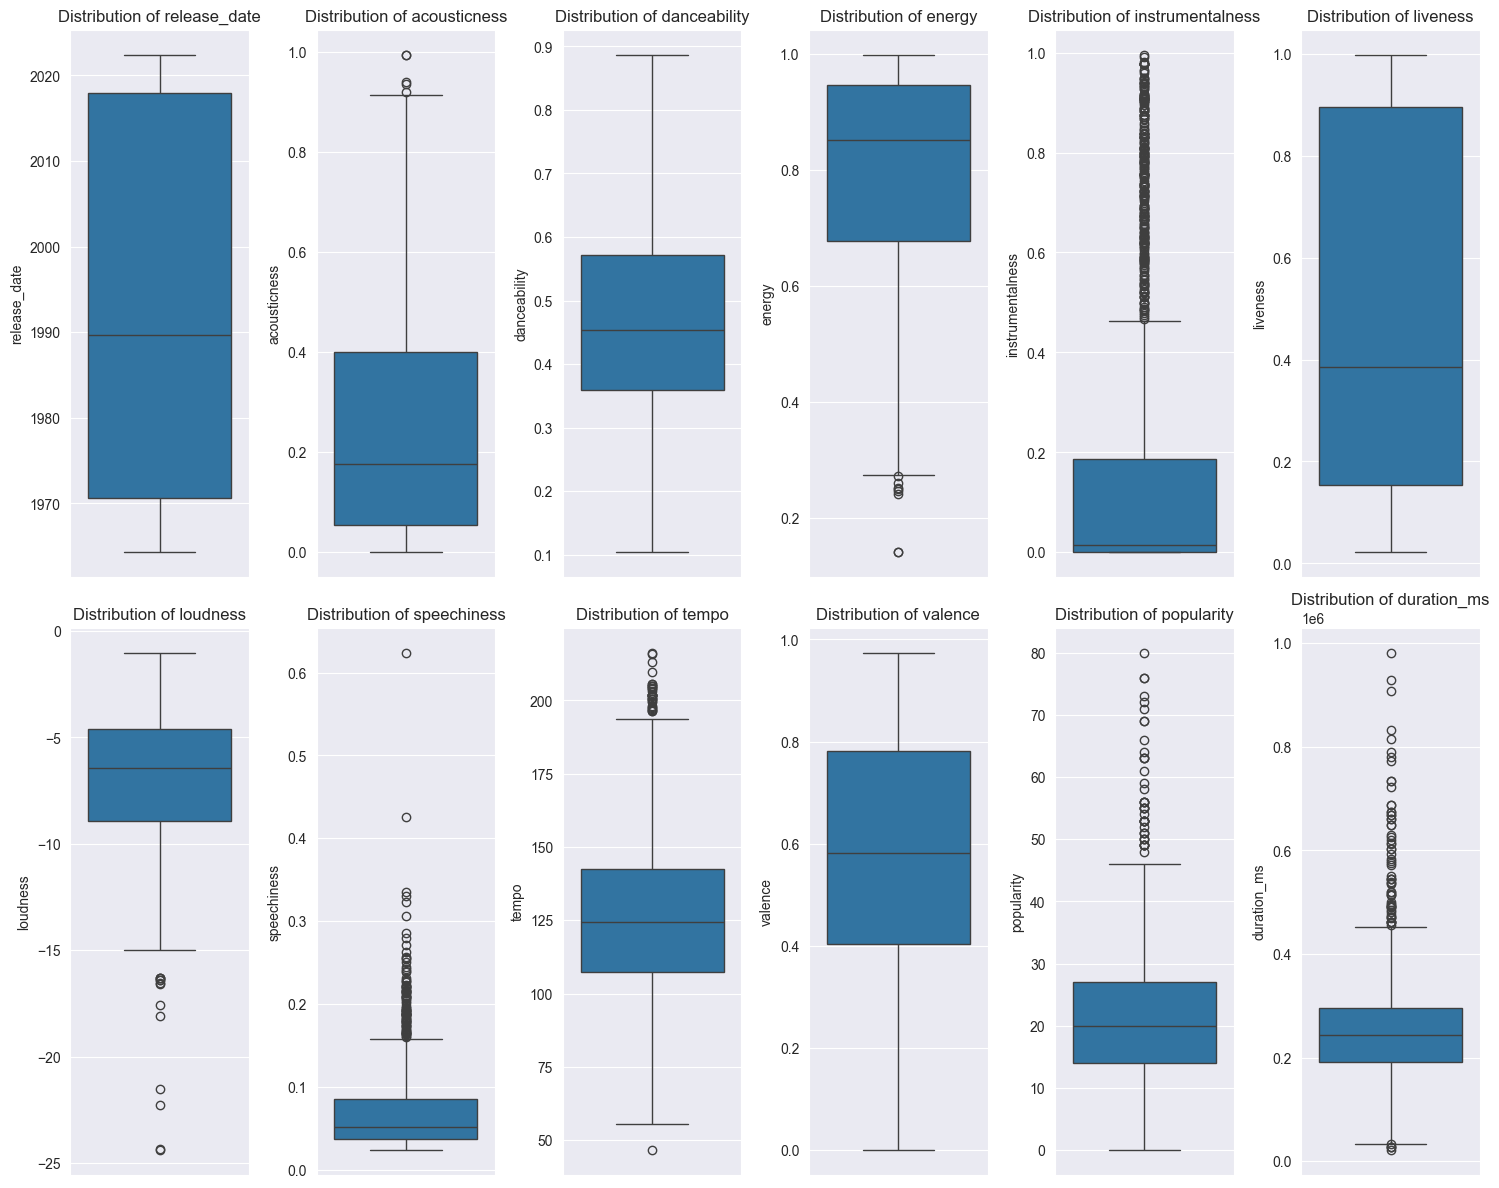

In [182]:
fig, axes = plt.subplots(2, 6, figsize=(15, 12))
cols = ['release_date', 'acousticness', 'danceability', 'energy', 'instrumentalness',
        'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
        'duration_ms']
show_plots_board(df_no_duplicates, cols, axes, False, 'boxplot')

In [183]:
! pip install feature_engine

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [184]:
from feature_engine.outliers import Winsorizer

# Define the Winsorizer
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5)

# Select numerical columns to apply Winsorizer
numerical_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                  'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
                  'popularity', 'duration_ms', 'release_year']

# Apply Winsorizer to the selected columns
df_final = df_no_duplicates.copy()
df_final[numerical_cols] = wins.fit_transform(df_no_duplicates[numerical_cols])

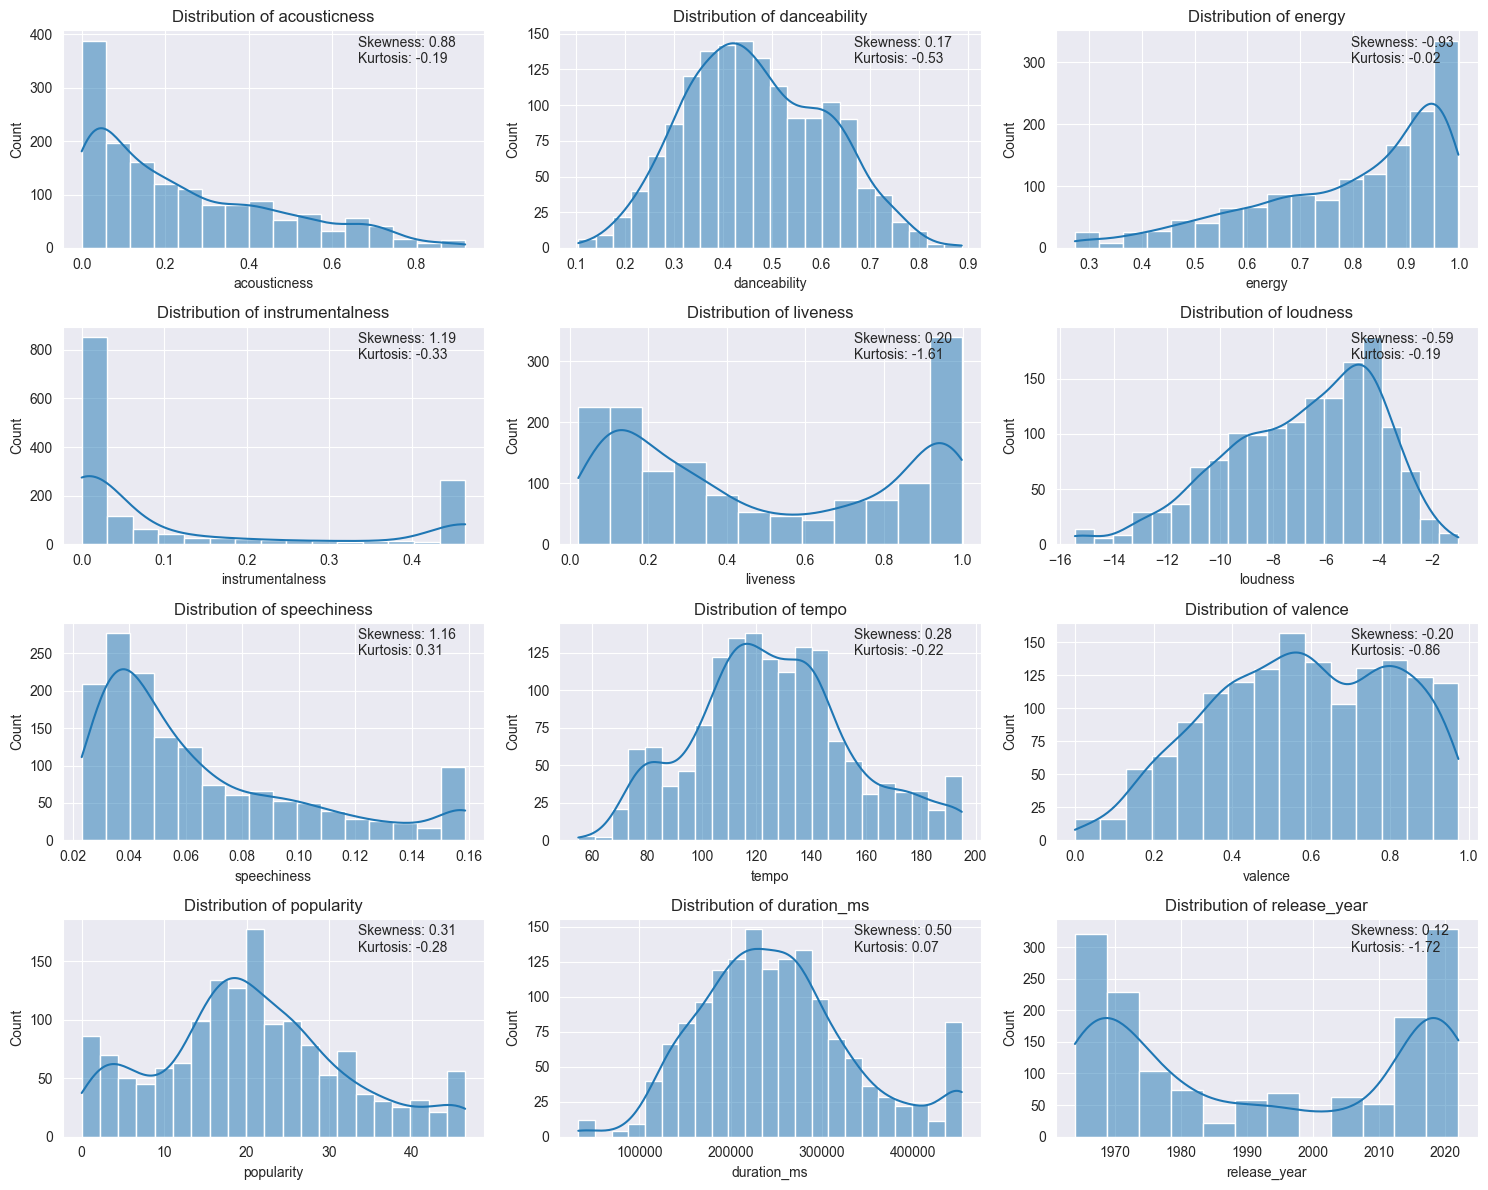

In [185]:
# Visualize distributions of key numerical variables
fig, axes = plt.subplots(4, 3, figsize=(15, 12))

show_plots_board(df_final, numerical_cols, axes)

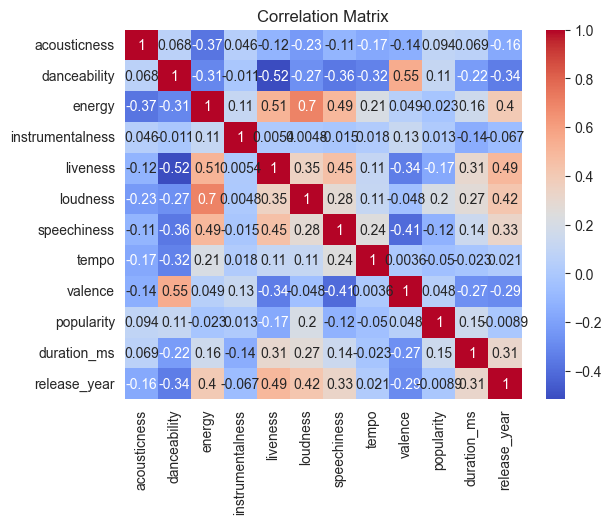

In [186]:
corr = df_final.drop(columns=['track_number']).corr(numeric_only=True)

# Generate heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_all_scatterplots(df, col, numerical_cols, rows=3):
    fig, axes = plt.subplots(5, 3, figsize=(30, 30))
    
    
    for j, col1 in enumerate(numerical_cols):
        ax = axes[j // 3, j % 3]
        sns.scatterplot(x=df[col], y=df[col1], ax=ax)
        ax.set_title(f'{col} vs {col1}')
        ax.set_xlabel(col1)
            
    plt.tight_layout()
    plt.show()

## The relationship between a song's popularity and various factors, exploring how this correlation has evolved

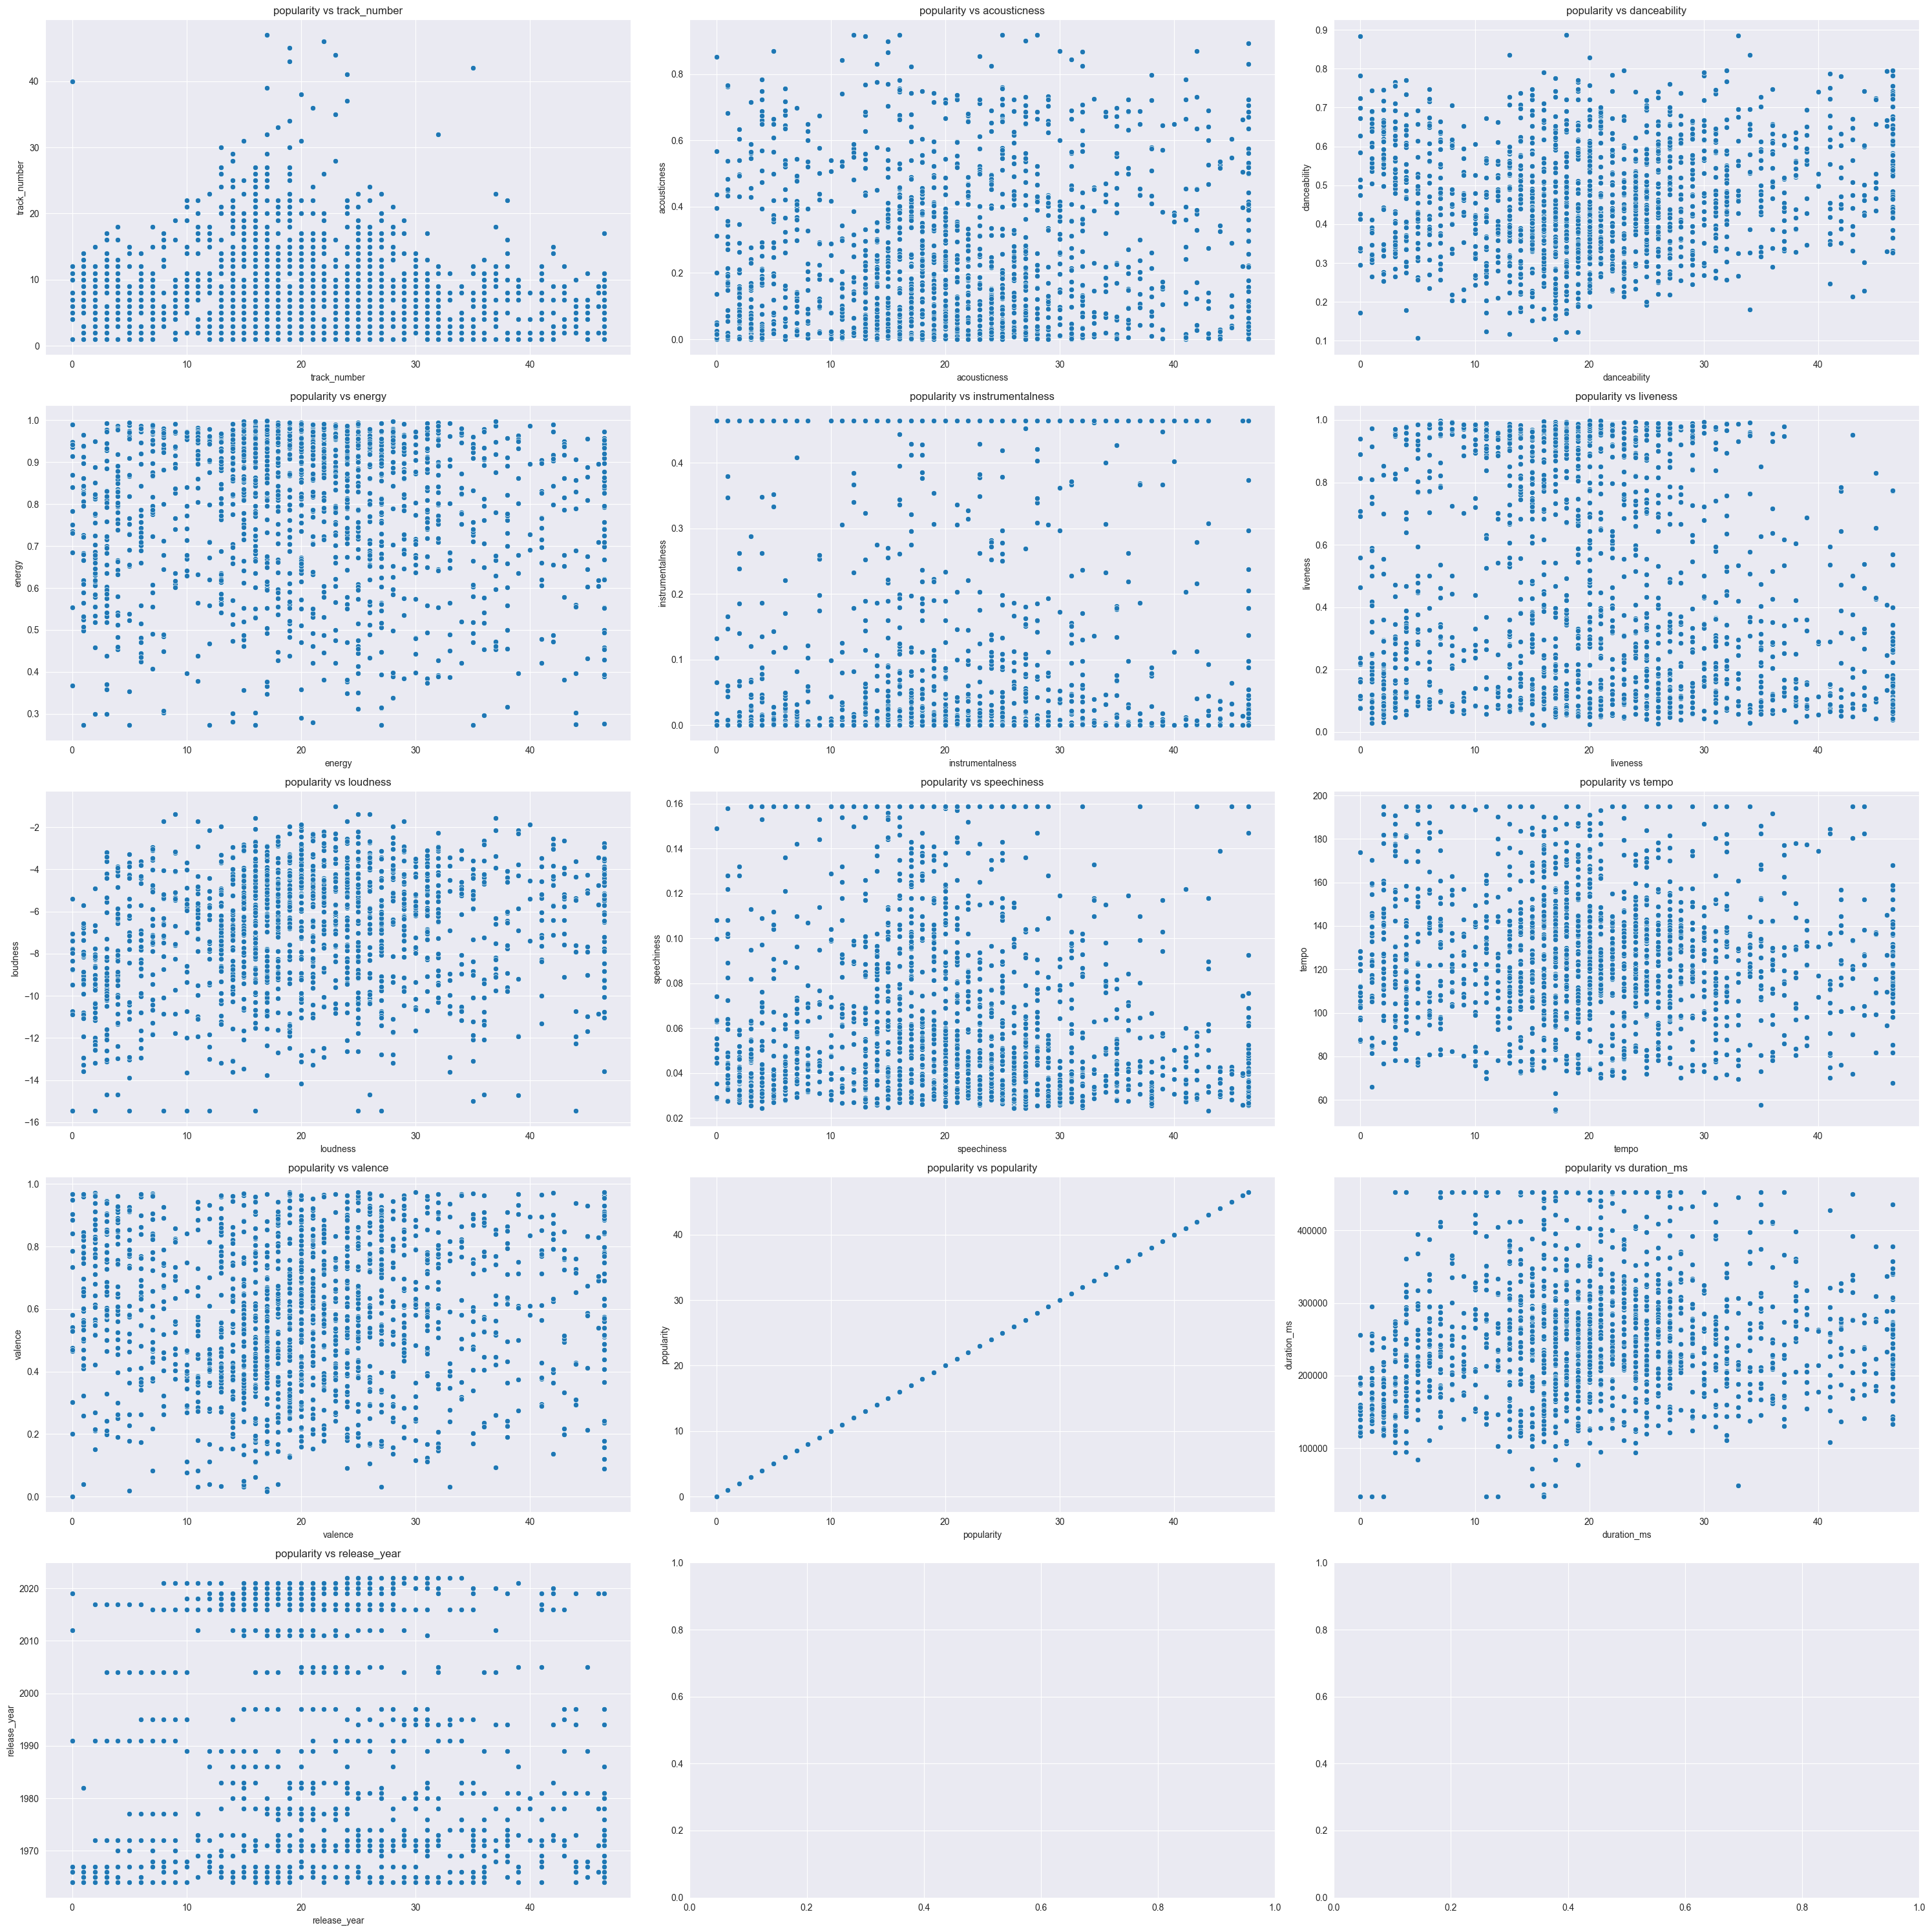

In [188]:
plot_all_scatterplots(df_final,  'popularity', df_final.select_dtypes(include=['number']).columns)

Explained Variance: [0.31467278 0.14446747]


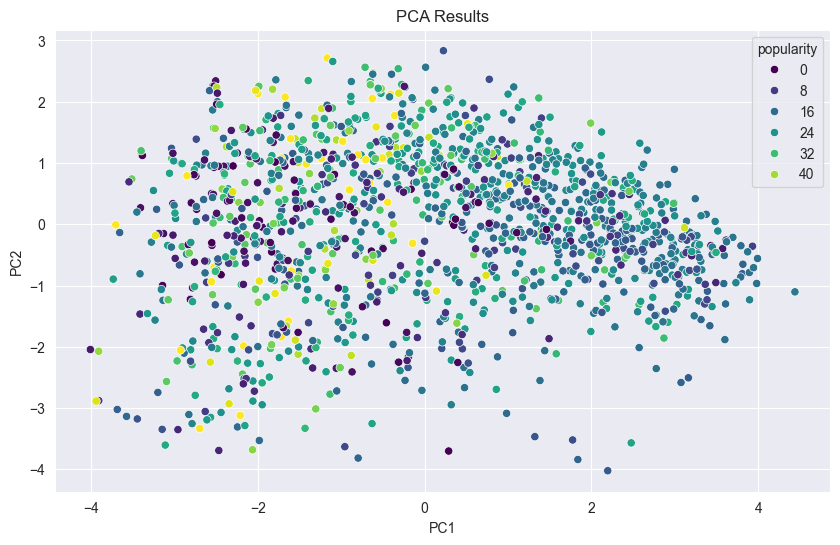

In [189]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


numeric_features = df_final.select_dtypes(include=['number']).drop(columns=['popularity', 'duration_ms'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)
df_scaled = pd.DataFrame(scaled_features, columns=numeric_features.columns)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance: {explained_variance}')

# Adding principal components to the dataframe
df_final['PC1'] = principal_components[:, 0]
df_final['PC2'] = principal_components[:, 1]

# Plotting the PCA results
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', data=df_final, hue='popularity', palette='viridis')
plt.title('PCA Results')
plt.show()

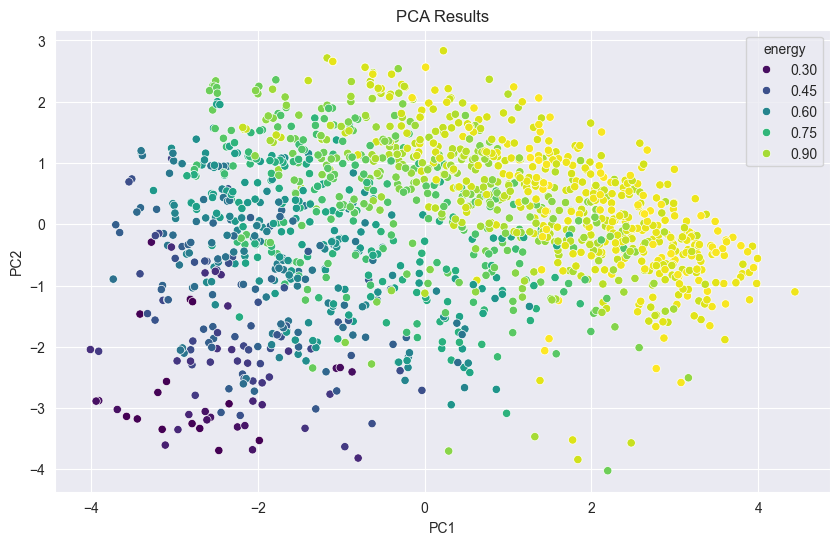

In [190]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', data=df_final, hue='energy', palette='viridis')
plt.title('PCA Results')
plt.show()

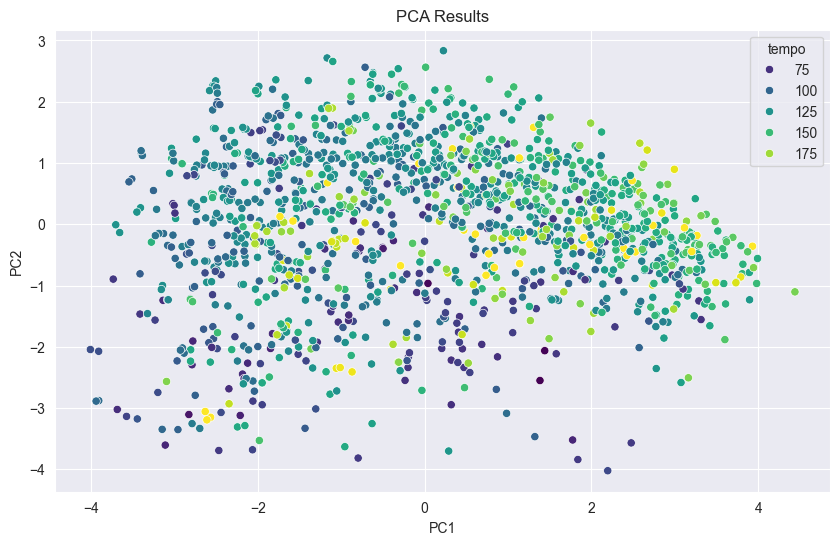

In [191]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', data=df_final, hue='tempo', palette='viridis')
plt.title('PCA Results')
plt.show()

### Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album

In [192]:
df_final['popularity'].describe()

count    1508.000000
mean       20.503979
std        11.307724
min         0.000000
25%        14.000000
50%        20.000000
75%        27.000000
max        46.500000
Name: popularity, dtype: float64

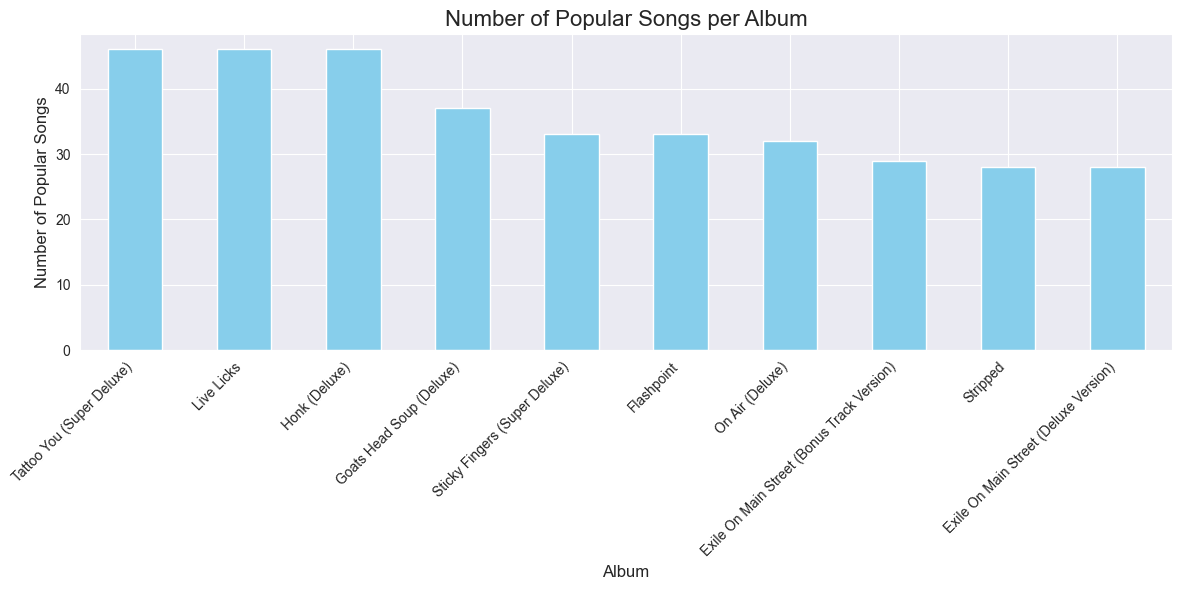

In [231]:
import matplotlib.pyplot as plt

# Filter the DataFrame for popular songs
popular_songs = df_final[df_final['popularity'] > 0]

# Group by album and count the number of popular songs
album_popularity = popular_songs.groupby('album').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
album_popularity.plot(kind='bar', color='skyblue')
plt.title('Number of Popular Songs per Album', fontsize=16)
plt.xlabel('Album', fontsize=12)
plt.ylabel('Number of Popular Songs', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Perform cluster analysis
•	Identify the right number of clusters
•	Use appropriate clustering algorithms
•	Define each cluster based on the features

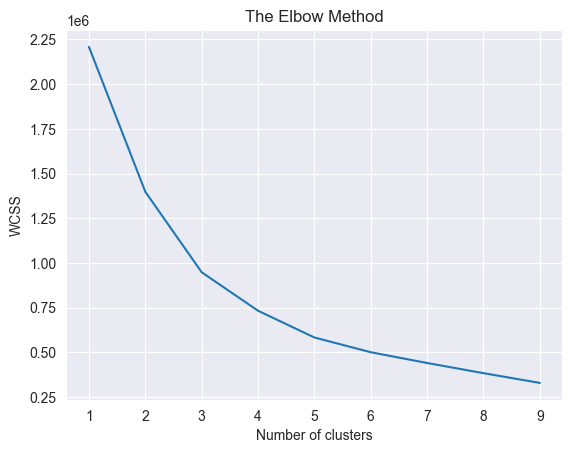

In [206]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
df_final = df_final.dropna()
X = df_final[['danceability', 'instrumentalness', 'tempo', 'popularity', 'release_year']]

wcss = []
for i in range(1, 10):
    model = KMeans(n_clusters = i, n_init=10, init = 'k-means++', random_state = 42)
    model.fit(X)
    wcss.append(model.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

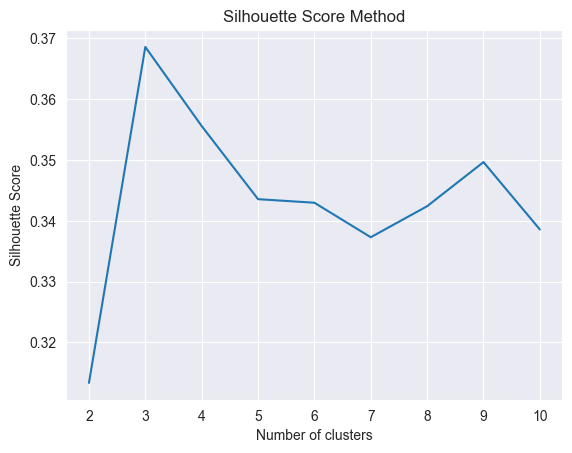

In [207]:
silhouette_scores = []
for i in range(2, 11):
    model = KMeans(n_clusters=i, n_init=10,  init='k-means++', random_state=42)
    model.fit(X)
    score = silhouette_score(X, model.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [211]:
model = KMeans(n_clusters = 3, init = 'k-means++', random_state = 1)
X['cluster'] = model.fit_predict(X)
X

/var/folders/x8/ps_xddr95734lgrb6gqpr7g80000gp/T/ipykernel_70589/1947882789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = model.fit_predict(X)


,danceability,instrumentalness,tempo,popularity,release_year,cluster
0,0.463,0.464617,118.001,33.0,2022,2
1,0.326,0.233000,131.455,34.0,2022,2
2,0.386,0.400000,130.066,34.0,2022,2
3,0.369,0.000107,132.994,32.0,2022,2
4,0.303,0.055900,130.533,32.0,2022,2
...,...,...,...,...,...,...
1605,0.466,0.006170,177.340,39.0,1964,0
1606,0.509,0.000002,122.015,36.0,1964,1
1607,0.790,0.000000,97.035,30.0,1964,1
1608,0.700,0.000070,102.634,27.0,1964,1


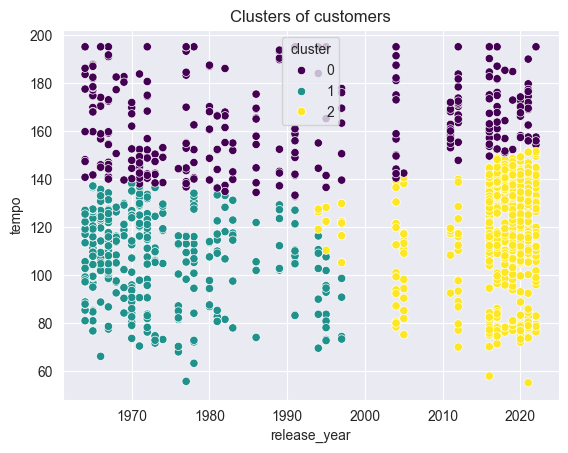

In [222]:
sns.scatterplot(data=X, x='release_year', y='tempo', hue='cluster', palette='viridis')
plt.title('Clusters of customers')
plt.show()

In [ ]:
sns.scatterplot(data=X, x='release_year', y='popularity', hue='cluster', palette='viridis')
plt.title('Clusters of customers')
plt.show()

In [213]:
X.groupby('cluster').mean()

,danceability,instrumentalness,tempo,popularity,release_year
cluster,,,,,
0,0.395546,0.122463,161.132145,19.381643,1987.599034
1,0.541433,0.134830,109.058134,21.379581,1972.675393
2,0.439564,0.106369,116.888274,20.432821,2016.690979
